In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [5]:
data=pd.read_csv("housing.csv")
print(data.describe())
data.head()

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.dropna(inplace=True)
X=data[['total_bedrooms']]
y=data['population']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_test)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

       total_bedrooms
14416           278.0
16383          1116.0
7731            853.0
1410            276.0
1335            597.0
...               ...
16764           340.0
5762            338.0
12862           506.0
18814           378.0
12852           276.0

[6130 rows x 1 columns]
[ 809.67505711 2801.67920925 2176.50368178 ... 1351.65232046 1047.38438314
  804.92087059]


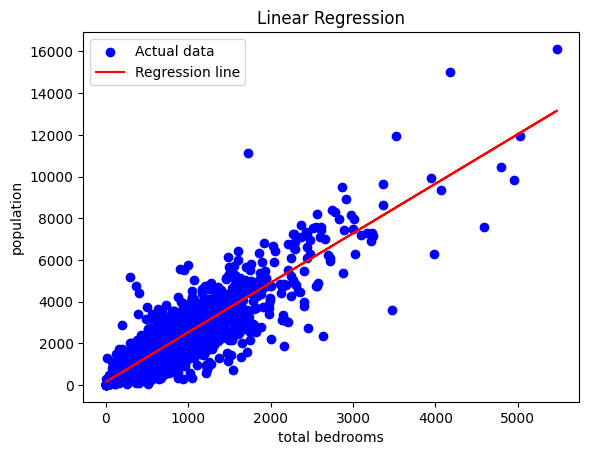

In [11]:
plt.scatter(X_test,y_test,color='blue',label="Actual data")
plt.plot(X_test,y_pred,color='red',label="Regression line")
plt.xlabel("total bedrooms")
plt.ylabel("population")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [12]:
#metrics
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2)

RMSE:  497.4871593975666
MAE:  313.7706812332216
R2 Score:  0.7964319915332763


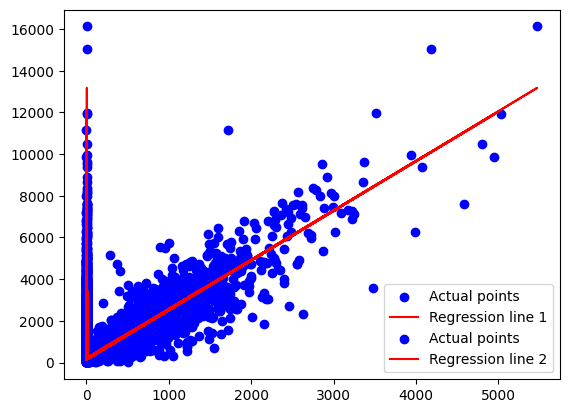

In [15]:
X=data[['total_bedrooms','median_income']]
y=data['population']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
yp=model.predict(X_test)

plt.scatter(X_test['total_bedrooms'],y_test,color='blue',label="Actual points")
plt.plot(X_test['total_bedrooms'],yp,color='red',label="Regression line 1")
plt.scatter(X_test['median_income'],y_test,color='blue',label="Actual points")
plt.plot(X_test['median_income'],yp,color='red',label="Regression line 2")
plt.legend()
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
X=data[['latitude']]
y=data['population']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
polyfeatures=PolynomialFeatures(degree=3)
X_train_poly=polyfeatures.fit_transform(X_train)
X_test_poly=polyfeatures.transform(X_test)

model1=LinearRegression()
model1.fit(X_train_poly,y_train)
y_predic=model1.predict(X_test_poly)


mse = mean_squared_error(y_test, y_predic)
print("Mean Squared Error:", mse)

Mean Squared Error: 1200874.916429591


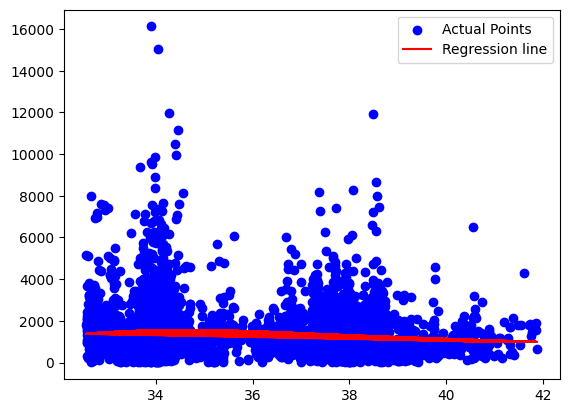

In [22]:
plt.scatter(X_test,y_test,color='blue',label='Actual Points')
plt.plot(X_test,y_predic,color='red',label='Regression line')
plt.legend()
plt.show()